# Model Design

By **Tyler Biggs**

For the IDREAM Database project.

---

## Introduction

A common paradigm in object-oriented-programming (OOP) is the development of a "model" which models the structure of a type of data. Extending this model to other parts of the program gives the common Model, Viewer, Controller framework. Under this design philosphy, the controller controls the interactions between the Model and the Viewer. In the case of this IDREAM database project, the Controller is best thought of as the Drupal site, the Model is defined in Python in the `isadream.isadream.models` folder, while the Viewer(s) are the Bokeh applications.

The most important (and least interacted with by users) and central component is the Model, and the purpose of this notebook is to introduce the way in which the IDREAM Database models a wide variety of data types and sources in a robust way.

---

*Notebook setup*

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pydot
from pydot import Node, Edge
from IPython.display import Image, display

def viewPydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

## Model Design

A user can create a single page at a time on the Drupal site. This creates a natural starting point for the oranizational structure. Within each Drupal Node we can define any number of fields for the user to fill out. The issue then is to pick fields that work for a wide range of data types and sources.

I will show the Model design in a series of node graphs.

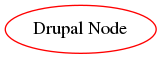

In [3]:
graph = pydot.Dot(graph_type='graph')
drupal_node = Node('Drupal Node', label="Drupal Node", color="red")
graph.add_node(drupal_node)
viewPydot(graph)

Within each Drupal Node we want the user to be able to:

+ Create comments that pertain to this node.
+ Create experimental factors that pertain to this node (and all its children).
+ Create sub-experiments (termed "assays" here) with their own comments, factors and data.

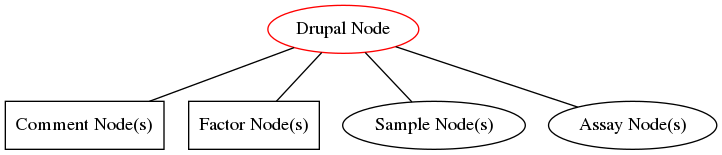

In [4]:
comment = Node('Comment Node(s)', shape='box')
factor = Node('Factor Node(s)', shape='box')
sample = Node('Sample Node(s)')
assay = Node('Assay Node(s)')

graph.add_node(comment)
graph.add_node(factor)
graph.add_node(sample)
graph.add_node(assay)

graph.add_edge(Edge(drupal_node, comment))
graph.add_edge(Edge(drupal_node, factor))
graph.add_edge(Edge(drupal_node, sample))
graph.add_edge(Edge(drupal_node, assay))

viewPydot(graph)

Here those nodes that are terminal (they have no children nodes) are shown as squares. While nodes with children are shown as ovals.

At this level there are two further nodes with children, and two terminal nodes.

### Assay Node Model

An assay can have:

+ Factors
+ Comments
+ Samples
+ Data

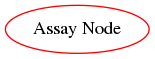

In [5]:
assay_graph = pydot.Dot(graph_type='graph')
assay_node = Node('Assay Node', color="red")
assay_graph.add_node(assay_node)
viewPydot(assay_graph)

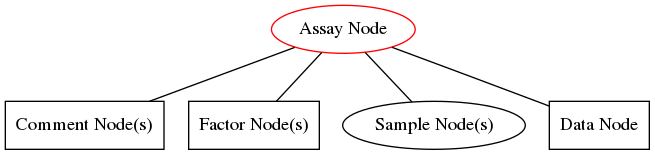

In [6]:
data = Node("Data Node", shape="box")

assay_graph.add_node(comment)
assay_graph.add_node(factor)
assay_graph.add_node(sample)
assay_graph.add_node(data)

assay_graph.add_edge(Edge(assay_node, comment))
assay_graph.add_edge(Edge(assay_node, factor))
assay_graph.add_edge(Edge(assay_node, sample))
assay_graph.add_edge(Edge(assay_node, data))
viewPydot(assay_graph)

### Sample Node Model

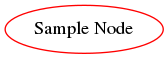

In [7]:
sample_graph = pydot.Dot(graph_type='graph')
sample_node = Node('Sample Node', color="red")
sample_graph.add_node(sample_node)
viewPydot(sample_graph)

To a sample node a user should be able to add:
+ Factors
+ Species
+ Sources (links to other samples)

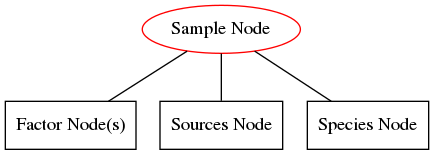

In [8]:
species = Node("Species Node", shape="box")
sources = Node("Sources Node", shape="box")

sample_graph.add_node(factor)
sample_graph.add_node(sources)
sample_graph.add_node(species)

sample_graph.add_edge(Edge(sample_node, factor))
sample_graph.add_edge(Edge(sample_node, sources))
sample_graph.add_edge(Edge(sample_node, species))
viewPydot(sample_graph)

## Elemental Nodes

Now that we are aware of what all the 'terminal' or 'elemental' nodes should be, we can define those in such a way that they satisfy requirements for every place they are used.

The defined types of elemental nodes are:
+ Factor
+ SpeciesFactor
+ NodeInformation
+ Comment
+ DataFile

### Factor Node

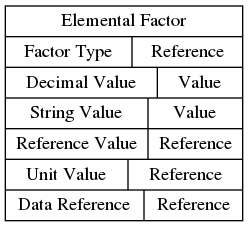

In [9]:
factor_graph = pydot.Dot(graph_type='graph')

label = (
    "{<f0> Elemental Factor    | "
        "{<f1> Factor Type     | <f2> Reference } |"
        "{<f3> Decimal Value   | <f4> Value}      |"
        "{<f5> String Value    | <f6> Value}      |"
        "{<f7> Reference Value | <f8> Reference}  |"
        "{<f9> Unit Value      | <f10> Reference} |"
        "{<f9> Data Reference  | <f10> Reference}  "
    "}"
)

elemental_factor = Node("Elemental Factor", 
                        shape="record",
                        rankdir="LR",
                        label=label)

factor_graph.add_node(elemental_factor)
viewPydot(factor_graph)


### Species Factor

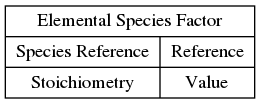

In [10]:
species_graph = pydot.Dot(graph_type='graph')

label = (
    "{<f0> Elemental Species Factor   | "
        "{<f1> Species Reference | <f2> Reference } |"
        "{<f3> Stoichiometry     | <f4> Value}      "
    "}"
)

elemental_species = Node("Elemental Species Factor", 
                        shape="record",
                        rankdir="LR",
                        label=label)

species_graph.add_node(elemental_species)
viewPydot(species_graph)

### Node Information

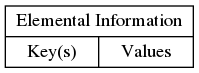

In [11]:
node_info_graph = pydot.Dot(graph_type='graph')

label = (
    "{<f0> Elemental Information      | "
        "{<f1> Key(s) | <f2> Values } "
    "}"
)

elemental_info = Node("Elemental Information", 
                        shape="record",
                        rankdir="LR",
                        label=label)

node_info_graph.add_node(elemental_info)
viewPydot(node_info_graph)

### Comment

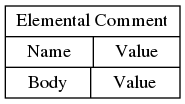

In [12]:
comment_graph = pydot.Dot(graph_type='graph')

label = (
    "{<f0> Elemental Comment      | "
        "{<f1> Name | <f2> Value }    |"
        "{<f3> Body | <f4> Value }    "
    "}"
)

elemental_comment = Node("Elemental Comment", 
                        shape="record",
                        rankdir="LR",
                        label=label)

comment_graph.add_node(elemental_comment)
viewPydot(comment_graph)

### DataFile

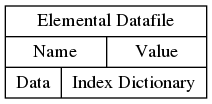

In [13]:
datafile_graph = pydot.Dot(graph_type='graph')

label = (
    "{<f0> Elemental Datafile      | "
        "{<f1> Name | <f2> Value }    |"
        "{<f3> Data | <f4> Index Dictionary }    "
    "}"
)

elemental_datafile = Node("Elemental Datafile", 
                        shape="record",
                        rankdir="LR",
                        label=label)

datafile_graph.add_node(elemental_datafile)
viewPydot(datafile_graph)

---

# Complete Model Overview

Now we can put all of this together into a complete model.

In [14]:
# Import some local helper functions.
from graphModel import elemental_node, container_node
import uuid

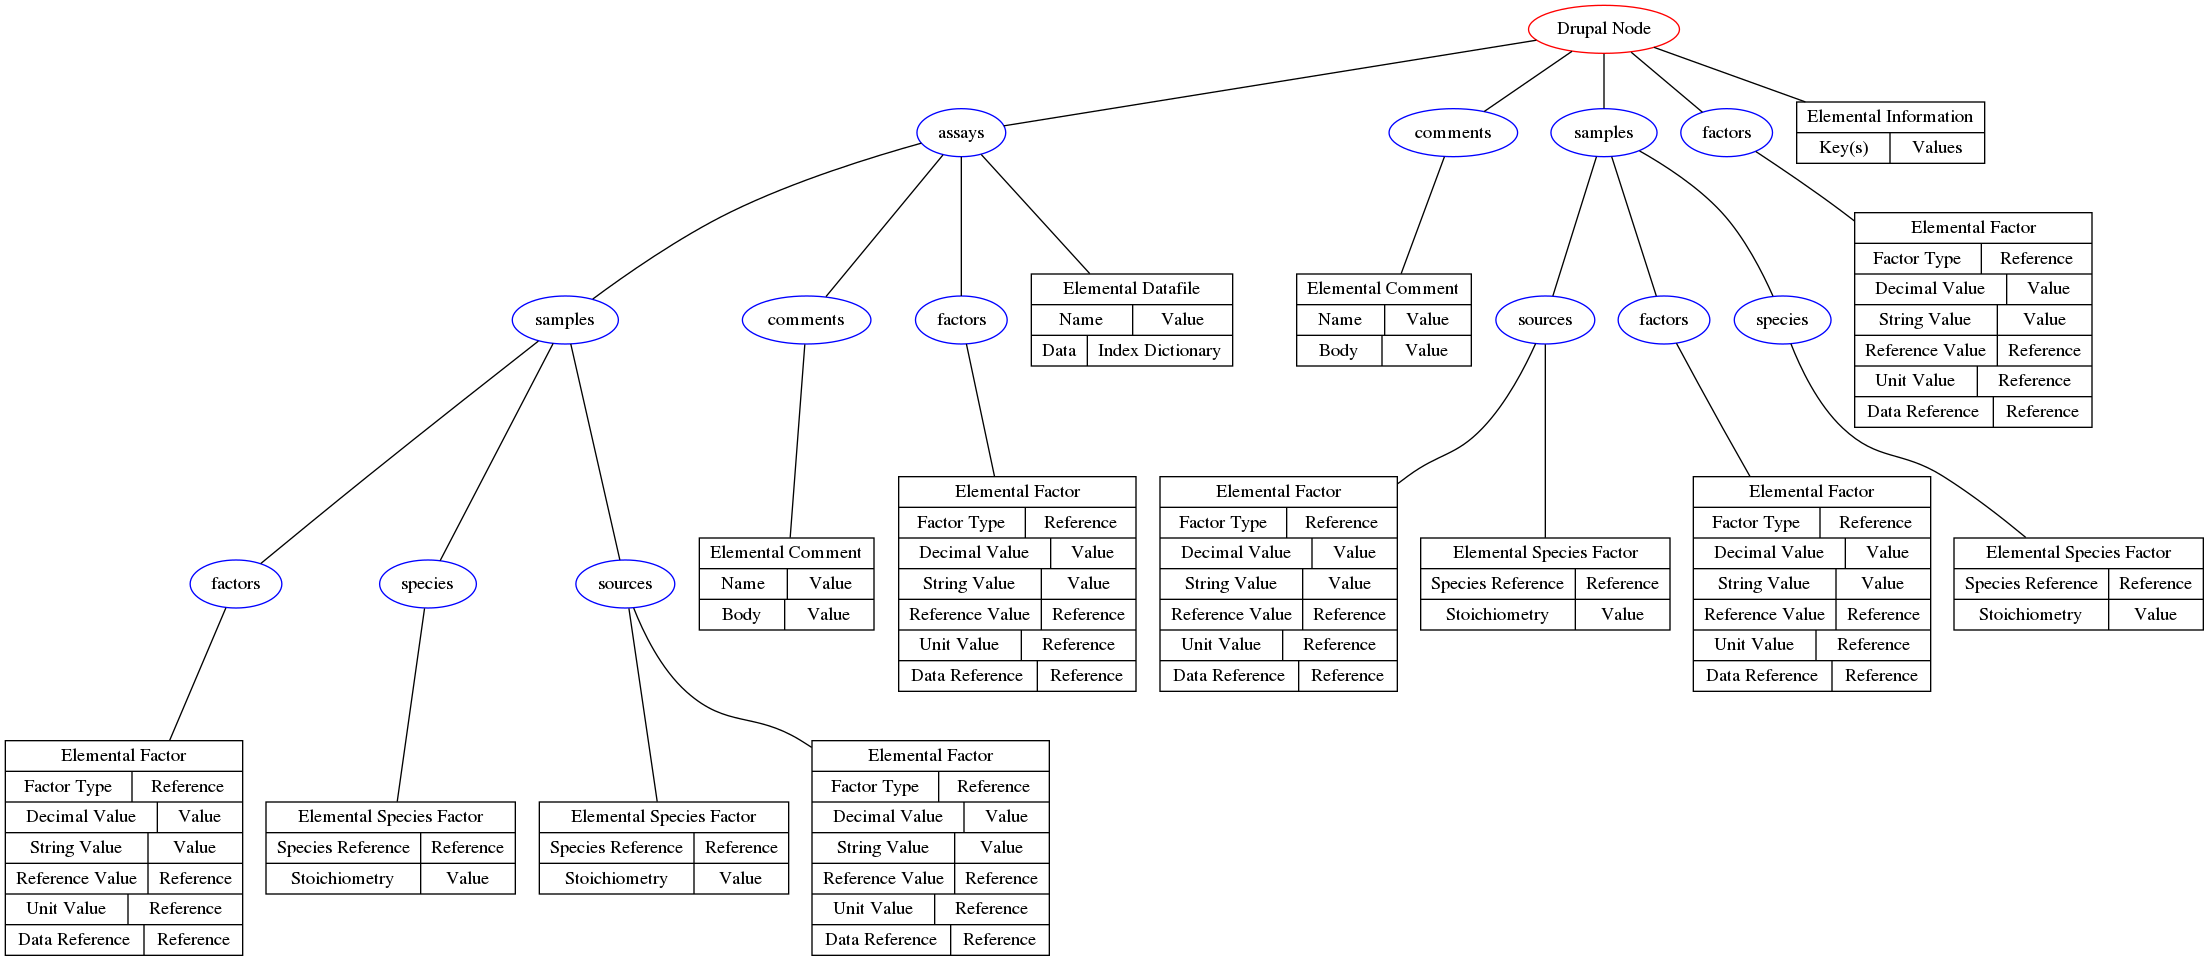

In [20]:
model_graph = pydot.Dot(graph_type='graph')

drupal_node = Node('Drupal Node', label="Drupal Node", color="red")
model_graph.add_node(drupal_node)

drupal_assays = container_node("assays")
model_graph.add_node(drupal_assays)

drupal_comments = container_node("comments")
model_graph.add_node(drupal_comments)

drupal_samples = container_node("samples")
model_graph.add_node(drupal_samples)

ds_sources = container_node("sources")
model_graph.add_node(ds_sources)

ds_source_factors = elemental_node("factor")
model_graph.add_node(ds_source_factors)

ds_source_species = elemental_node("species")
model_graph.add_node(ds_source_species)

drupal_factors = container_node("factors")
model_graph.add_node(drupal_factors)

drupal_info = elemental_node("info")
model_graph.add_node(drupal_info)

d_comment_element = elemental_node("comment")
model_graph.add_node(d_comment_element)

d_sample_factors = container_node("factors")
model_graph.add_node(d_sample_factors)

ds_factor_element = elemental_node("factor")
model_graph.add_node(ds_factor_element)

ds_species_element = elemental_node("species")
model_graph.add_node(ds_species_element)

d_sample_species = container_node("species")
model_graph.add_node(d_sample_species)

assay_samples = container_node("samples")
model_graph.add_node(assay_samples)

assay_comments = container_node("comments")
model_graph.add_node(assay_comments)

assay_factors = container_node("factors")
model_graph.add_node(assay_factors)

assay_data = elemental_node("data")
model_graph.add_node(assay_data)

d_factor_element = elemental_node("factor")
model_graph.add_node(d_factor_element)

assay_factor_element = elemental_node("factor")
model_graph.add_node(assay_factor_element)

assay_comment_element = elemental_node("comment")
model_graph.add_node(assay_comment_element)

a_s_factors = container_node("factors")
model_graph.add_node(a_s_factors)

a_s_species = container_node("species")
model_graph.add_node(a_s_species)

a_s_sources = container_node("sources")
model_graph.add_node(a_s_sources)

as_source_species = elemental_node("species")
model_graph.add_node(as_source_species)

as_source_factors = elemental_node("factor")
model_graph.add_node(as_source_factors)


as_species_element = elemental_node("species")
model_graph.add_node(as_species_element)

as_factor_element = elemental_node("factor")
model_graph.add_node(as_factor_element)



edges = [
    Edge(drupal_node, drupal_assays),
    Edge(drupal_node, drupal_samples),
    Edge(drupal_node, drupal_comments),
    Edge(drupal_node, drupal_factors),
    Edge(drupal_node, drupal_info),
    
    Edge(drupal_factors, d_factor_element),
    
    Edge(drupal_samples, ds_sources),
    
    
    Edge(ds_sources, ds_source_factors),
    Edge(ds_sources, ds_source_species),
    
#     ds_source_factors
#     ds_source_species
    
    Edge(drupal_samples, d_sample_factors),
    Edge(d_sample_factors, ds_factor_element),
    Edge(drupal_samples, d_sample_species),
    Edge(d_sample_species, ds_species_element),
    
    
    Edge(drupal_comments, d_comment_element),
    
    
    Edge(drupal_assays, assay_samples),
    Edge(drupal_assays, assay_comments),
    Edge(drupal_assays, assay_factors),
    Edge(drupal_assays, assay_data),
    
    Edge(assay_factors, assay_factor_element),
    Edge(assay_comments, assay_comment_element),
    
    Edge(assay_samples, a_s_factors),
    Edge(assay_samples, a_s_species),
    Edge(assay_samples, a_s_sources),
    
    Edge(a_s_sources, as_source_species),
    Edge(a_s_sources, as_source_factors),
    
    
    Edge(a_s_factors, as_factor_element),
    Edge(a_s_species, as_species_element)

]

for edge in edges:
    model_graph.add_edge(edge)

viewPydot(model_graph)